## A4_2 : Conduct Cluster Analysis to characterize respondents based on background variables

Name : Aakash Kathirvel

VID : V01110153

Date : 07/08/2024

In [22]:
#Import Necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [23]:
# Upload your dataset
uploaded = files.upload()

Saving Survey.csv to Survey (1).csv


In [24]:
# Load your dataset
df = pd.read_csv(next(iter(uploaded.keys())))

In [25]:
# Display the first few rows of the dataset
print(df.head())

        City Sex    Age      Occupation Monthly Household Income  Income  \
0  Bangalore   M  26-35  Private Sector         85,001 to105,000   95000   
1  Bangalore   M  46-60  Government/PSU         45,001 to 65,000   55000   
2  Bangalore   F  46-60  Government/PSU         25,001 to 45,000   35000   
3  Bangalore   M  36-45  Private Sector                  >125000  200000   
4  Bangalore   M  26-35   Self Employed         85,001 to105,000   95000   

  Planning to Buy a new house Time Frame Reasons for buying a house  \
0                         Yes  6M to 1Yr                   Residing   
1                         Yes  6M to 1Yr                 Investment   
2                         Yes  <6 Months              Rental Income   
3                         Yes  <6 Months                 Investment   
4                         Yes     1-2 Yr                   Residing   

  what type of House  ... 4. Availability of domestic help Time  Size Budgets  \
0          Apartment  ...          

In [26]:
# Summary statistics of the dataset
print(df.describe())

              Income  1.Proximity to city  2.Proximity to schools  \
count      70.000000            70.000000               70.000000   
mean    99000.000000             3.628571                3.442857   
std     59670.593345             0.870972                1.016326   
min     35000.000000             1.000000                2.000000   
25%     55000.000000             3.000000                3.000000   
50%     75000.000000             4.000000                3.000000   
75%    115000.000000             4.000000                4.000000   
max    200000.000000             5.000000                5.000000   

       3. Proximity to transport  4. Proximity to work place  \
count                  70.000000                   70.000000   
mean                    4.071429                    3.842857   
std                     0.728736                    0.942333   
min                     3.000000                    2.000000   
25%                     4.000000                    3.0000

In [27]:
# Check for missing values
print("Total missing values:", df.isnull().sum().sum())

Total missing values: 0


In [28]:
# Extract the relevant columns for the cluster analysis
# Assuming columns 20 to 46 contain the data for clustering
sur_int = df.iloc[:, 19:46]

In [29]:
# Normalize the data
scaler = StandardScaler()
sur_int_scaled = scaler.fit_transform(sur_int)

In [30]:
# Perform K-means clustering
# Determine the optimal number of clusters using the silhouette score
silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=25, random_state=123)
    cluster_labels = kmeans.fit_predict(sur_int_scaled)
    silhouette_avg = silhouette_score(sur_int_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

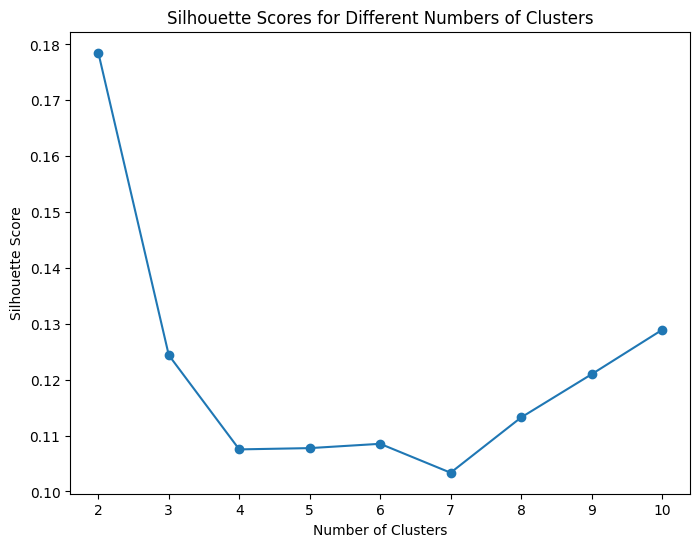

In [31]:
# Plot the silhouette scores to find the optimal number of clusters
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
# Apply K-means clustering with the chosen number of clusters (e.g., 4)
optimal_clusters = 4  # Replace with the optimal number found from the plot
kmeans = KMeans(n_clusters=optimal_clusters, n_init=25, random_state=123)
km_res = kmeans.fit_predict(sur_int_scaled)

In [34]:
# Add cluster labels to the original data
df['Cluster'] = km_res

In [36]:
# Verify the addition of cluster labels
print("Cluster labels added to the dataframe:")
print(df[['Cluster']].head())


Cluster labels added to the dataframe:
   Cluster
0        2
1        2
2        2
3        0
4        3


In [39]:
# Perform hierarchical clustering
# Compute the distance matrix
from scipy.spatial.distance import pdist

distance_matrix = pdist(sur_int_scaled, metric='euclidean')
linkage_matrix = linkage(distance_matrix, method='ward')


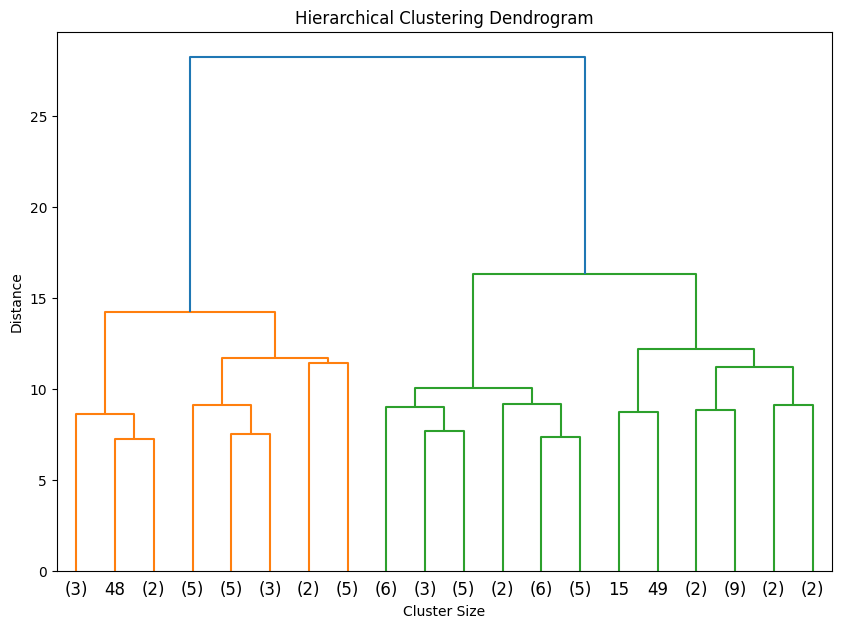

In [42]:
# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linkage_matrix, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

In [43]:
# Cut the dendrogram to create clusters
clusters_hc = fcluster(linkage_matrix, t=optimal_clusters, criterion='maxclust')

In [45]:
# Add hierarchical clustering labels to the original data
df['Cluster_HC'] = clusters_hc

In [47]:
# Verify the addition of hierarchical cluster labels
print("Hierarchical cluster labels added to the dataframe:")
print(df[['Cluster_HC']].head())

Hierarchical cluster labels added to the dataframe:
   Cluster_HC
0           4
1           4
2           4
3           1
4           3


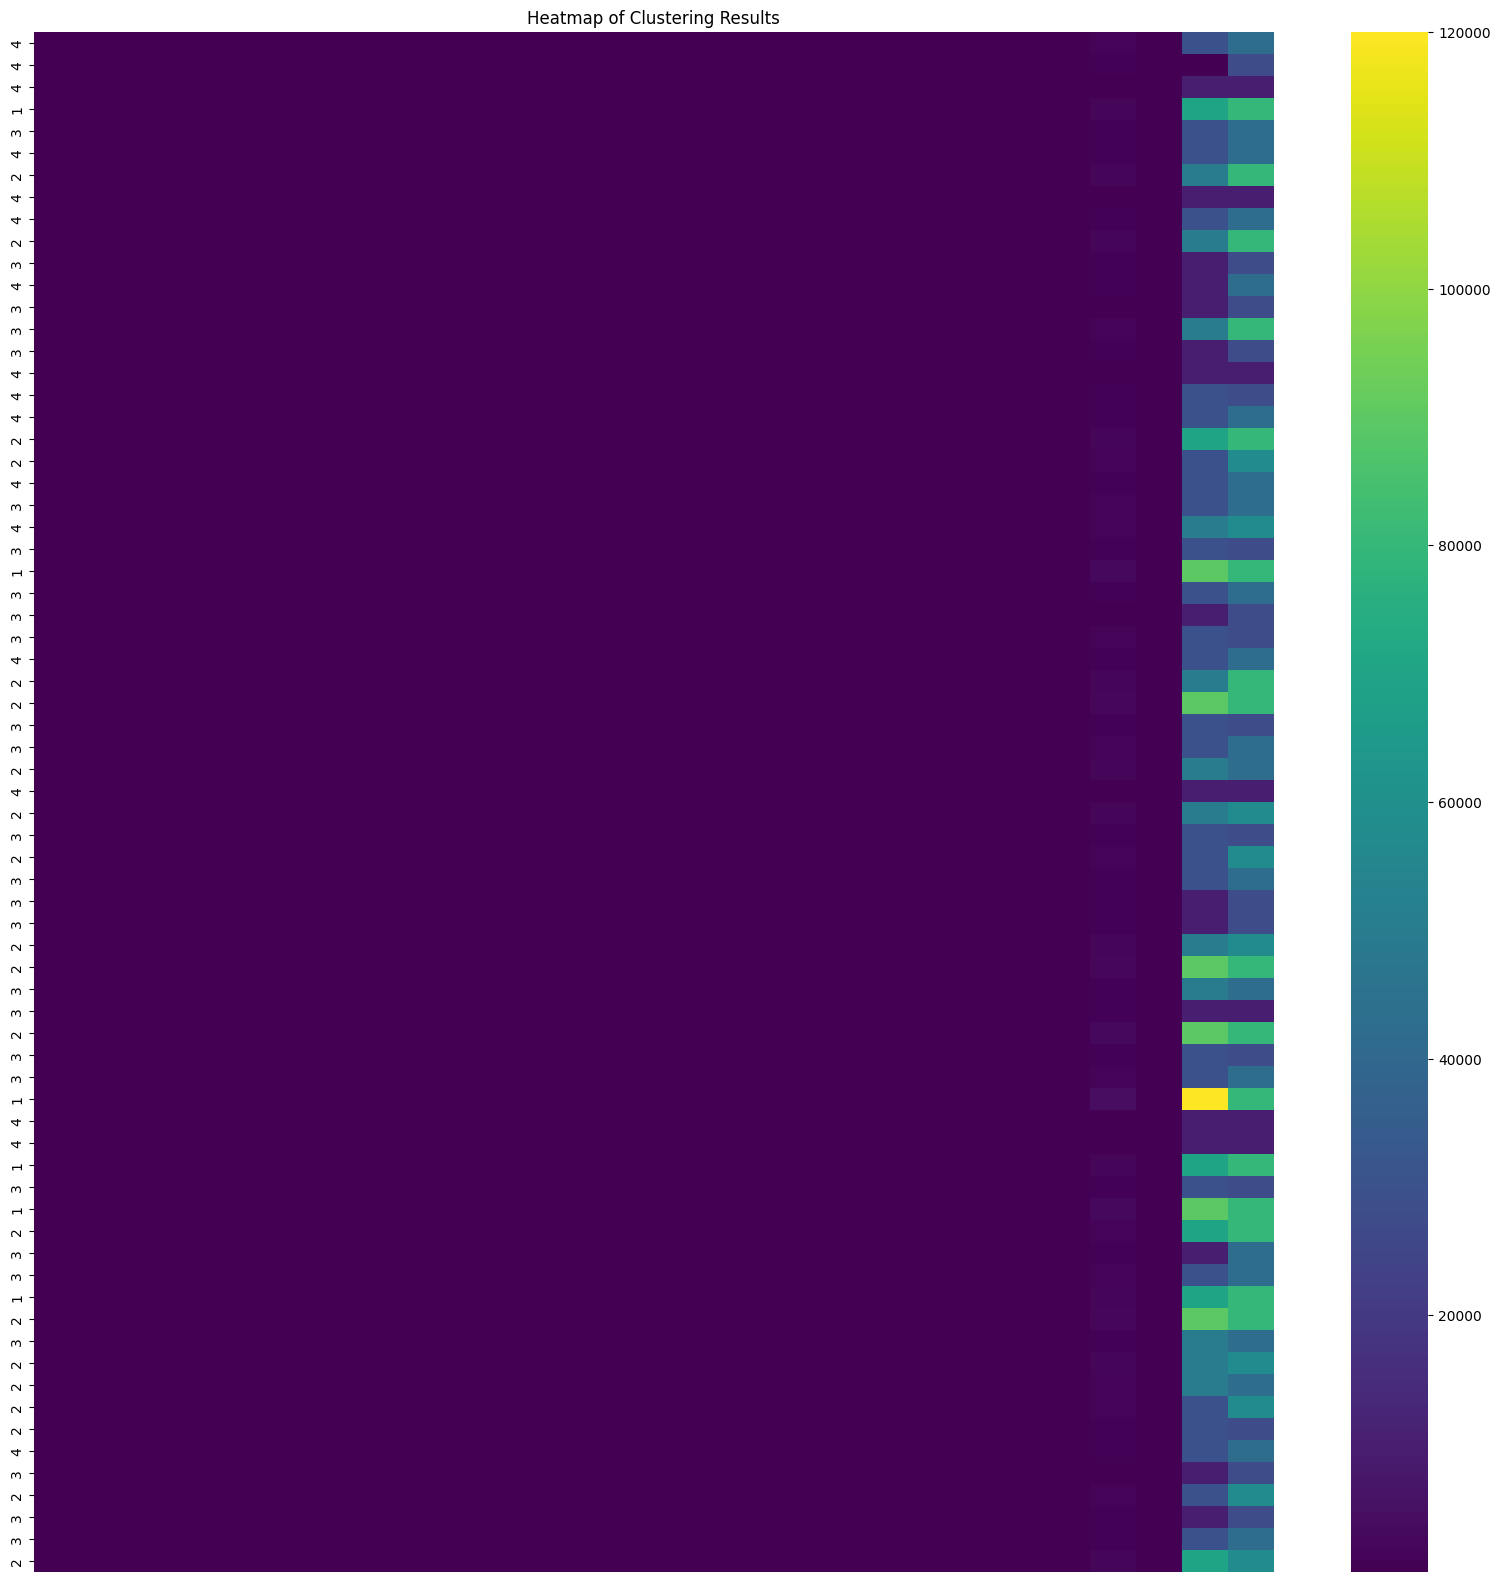

In [54]:
# Generate a heatmap to visualize the clustering result
# Create a DataFrame for the heatmap
heatmap_data = df.copy()
heatmap_data['Cluster_HC'] = heatmap_data['Cluster_HC'].astype(str)  # Convert cluster labels to string for color coding

plt.figure(figsize=(20, 20))
sns.heatmap(sur_int, cmap='viridis', annot=False, fmt='d', cbar=True, xticklabels=False, yticklabels=heatmap_data['Cluster_HC'])
plt.title('Heatmap of Clustering Results')
plt.show()